 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)

# get the top 5
whale_returns.head()
# check other records too 
whale_returns.sample(5) 
# check the data types to make sure its consistent
whale_returns.dtypes
#number of rows
whale_returns.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [3]:
# Count nulls
# Based on above script it looks like only one null row, lets confirm
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns=whale_returns.dropna()
whale_returns.isnull().sum()
#yay! 1 null is deleted 

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_return_data = Path("Resources/algo_returns.csv")
algo_return = pd.read_csv(algo_return_data)
algo_return.set_index(pd.to_datetime(algo_return['Date'], infer_datetime_format=True), inplace=True)

algo_return.head()


,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_return.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_return = algo_return.dropna()
algo_return.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data=Path("Resources/sp500_history.csv")
sp500=pd.read_csv(sp500_data)
sp500=sp500.copy()
sp500.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
# To change object to float, first step is to convert that to number which means stripping the string characters
sp500["Close"]=sp500["Close"].str.replace("$", "")
sp500["Close"]=sp500["Close"].astype("float")
sp500.dtypes

/Users/chandanyadav/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Date      object
Close    float64
dtype: object

# Calculate Daily Returns

### Calculate Daily Returns (Method 1)

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

Where $r$ is daily returns, ${p_{t}}$ is the price at time $t$, and ${p_{t-1}}$ is the price at $t-1$ (offset by 1).

https://www.w3resource.com/pandas/dataframe/dataframe-shift.php#:~:text=The%20shift()%20function%20is,with%20an%20optional%20time%20freq.&text=Number%20of%20periods%20to%20shift,Can%20be%20positive%20or%20negative.&text=Offset%20to%20use%20from%20the,(e.g.%20'EOM').


In [11]:
# Calculate Daily Returns
#lets make Data as Index before doing any calculation
# Based on reading above description, if Index is not set, shift may not work properly
sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True), inplace=True)
sp500.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [12]:
# Drop the extra date column
sp500.drop(columns=['Date'], inplace=True)
sp500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Actual calculation here
daily_returns_sp500=(sp500 - sp500.shift(1))/sp500.shift(1)
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Looks like pct_change() is a better alternative... Why did I learn Shift(), maybe it will come to use later
daily_returns_sp500 = sp500.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.isna().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
# LearnThroError - why does columns doesn't list Index column
# LearnThroError - When do we know what is a function vs not. Head is a function but columns is not 

daily_returns_sp500.columns
columns=["sp500Close"]
daily_returns_sp500.columns = columns
daily_returns_sp500.head()

,sp500Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_whale_df = pd.concat([whale_returns, algo_return, daily_returns_sp500], axis="columns", join="inner")
combined_whale_df.head()

# LearnThroError - All data has to be indexed or concat will not work
combined_whale_df.sort_index(inplace=True)

combined_whale_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,sp500Close
Date,,,,,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2015-03-03,-0.001942,-0.000949,0.004408
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416,-0.001195
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323,0.014378
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460,-0.003929
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303,0.017254


---

In [18]:
# Remove duplicate date columns
combined_whale_df.drop(columns=['Date'], inplace=True)
combined_whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns - All Portfolis'}, xlabel='Date'>

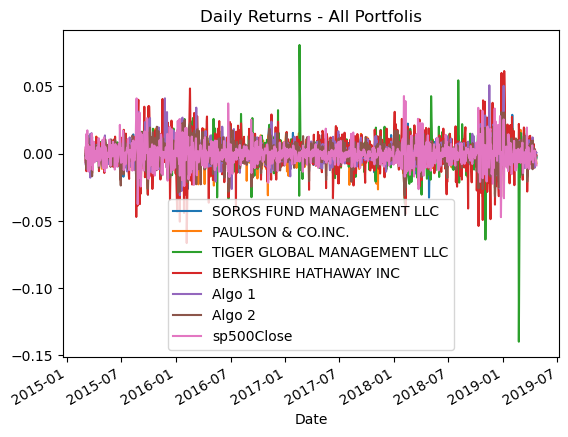

In [19]:
# Plot daily returns of all portfolios
combined_whale_df.plot(title="Daily Returns - All Portfolis")
#LearnThroError - There are so many variables in plot, not sure what I need to use to make below diagram useful for anyone to read
#LearnThroError - Dig plot variables, Explore figsize

#### Calculate and Plot cumulative returns.

In [20]:
# Calculate cumulative returns of all portfolios
#Calculating simple daily cumulative returns of a stock
#The simple cumulative daily return is calculated by taking the cumulative product of the daily percentage change. 
#LearnThroError - Don't know why + 1 has to be done for cumprod calculation... I got some bad numbers when I did without +1
#AskInstructor - Cumprod functionality, got the confirmation that adding 1 is to convert the percentage into number
#

#Cumulative returns can be found by cumprod function
combined_whale_df_cumulative_returns = (combined_whale_df + 1).cumprod()
combined_whale_df_cumulative_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:title={'center':'Cumulative returns - All Portfolio'}, xlabel='Date'>

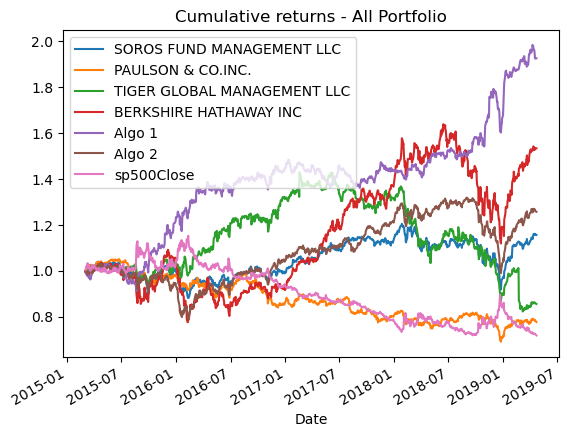

In [21]:
# Plot cumulative returns
#AskInstructor - Understand how to make plot better, Dig deep()
combined_whale_df_cumulative_returns.plot(title="Cumulative returns - All Portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

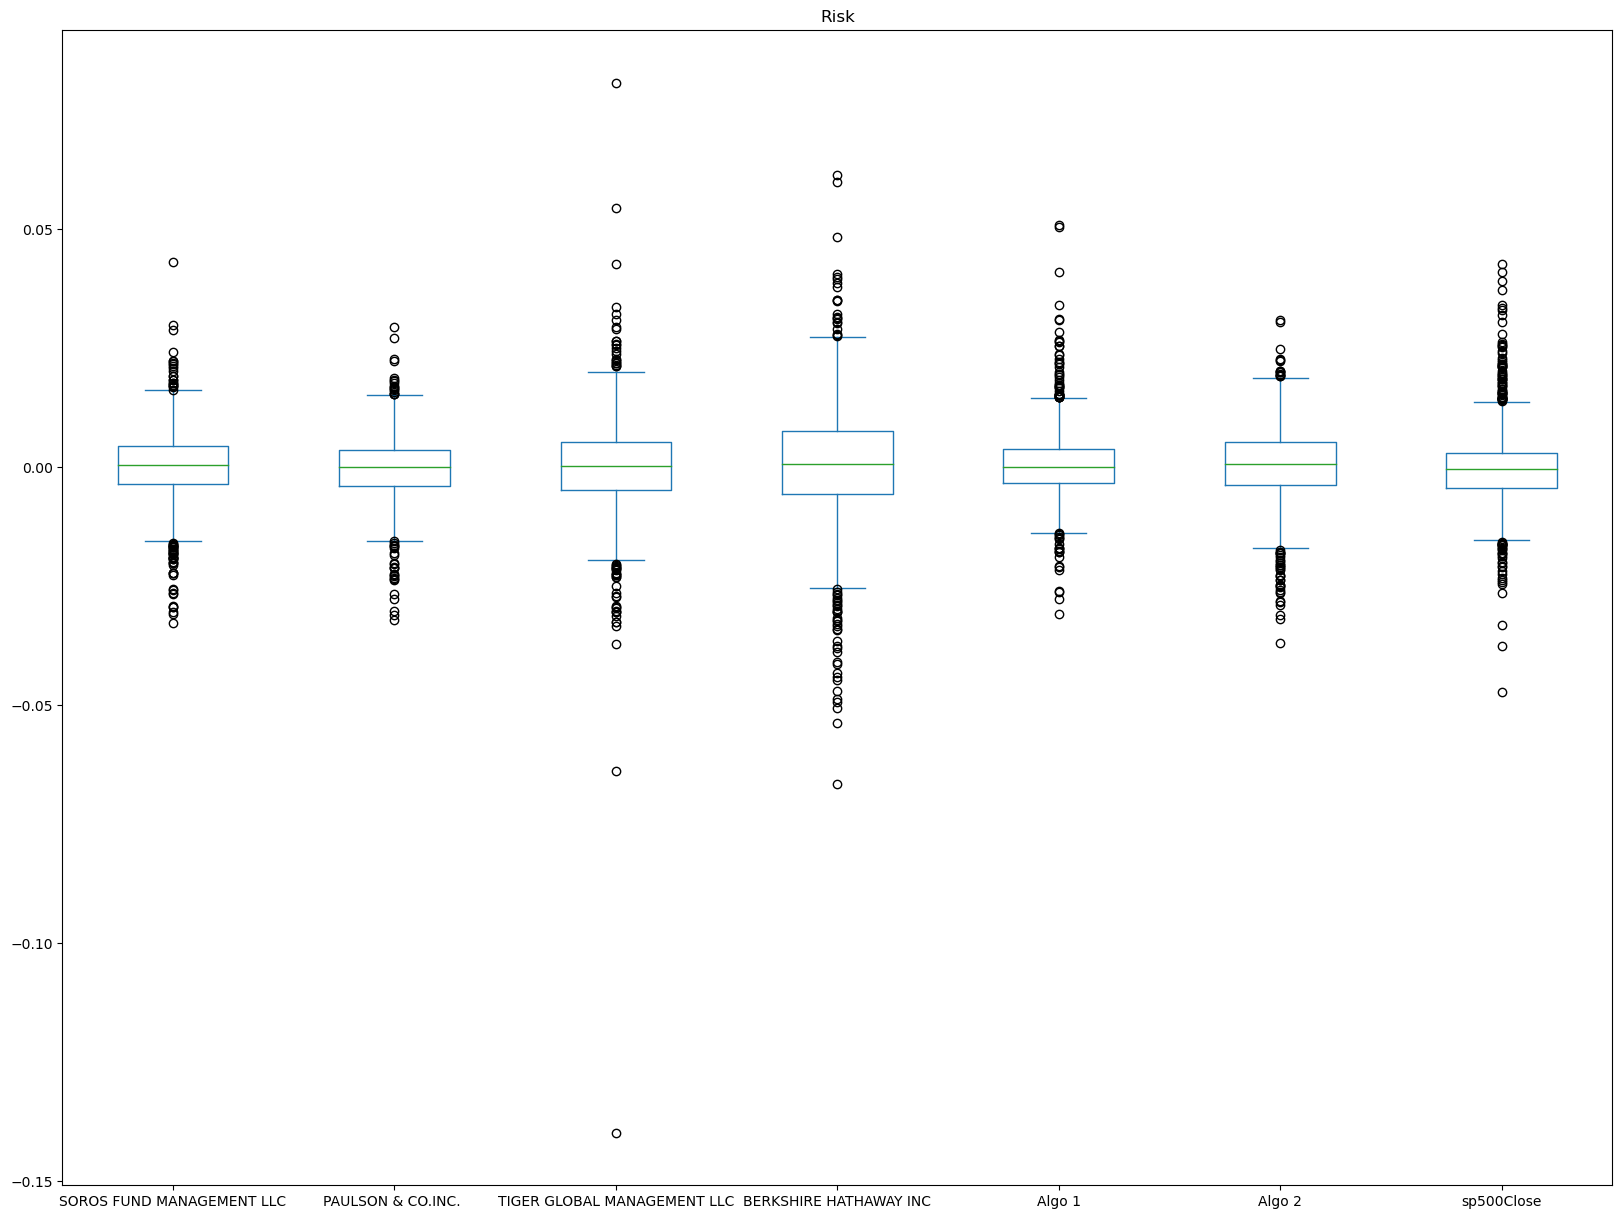

In [24]:
# Box plot to visually show risk
#LearnThroError - Got the confirmation that figsize is the variable to use when we need to adjust how the image looks
combined_whale_df.plot.box(title="Risk", figsize=(20, 15))

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
combined_whale_df_daily_std_dev = combined_whale_df.std().sort_values(ascending=False)
combined_whale_df_daily_std_dev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
sp500Close                     0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
# LearnThroError - If ascending=False is not added above, then comparison wont work, wasted time debugging 
# after leaving out a simple command

risky_portfolio_to_sp500 = [combined_whale_df_daily_std_dev > combined_whale_df_daily_std_dev['sp500Close']]
risky_portfolio_to_sp500
# Determine which portfolios are riskier than the S&P 500


[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 sp500Close                     False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
# Useful link that explains how the calculation is done for standard deviation
# https://financetrain.com/calculate-annualized-standard-deviation
# Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250) if 250 is number of trading days 
# we have been using 252 in the class for no of trading days in a year
combined_whale_df_annual_std_dev = combined_whale_df_daily_std_dev * np.sqrt(252)
combined_whale_df_annual_std_dev.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
sp500Close                     0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 day rolling std dev'}, xlabel='Date'>

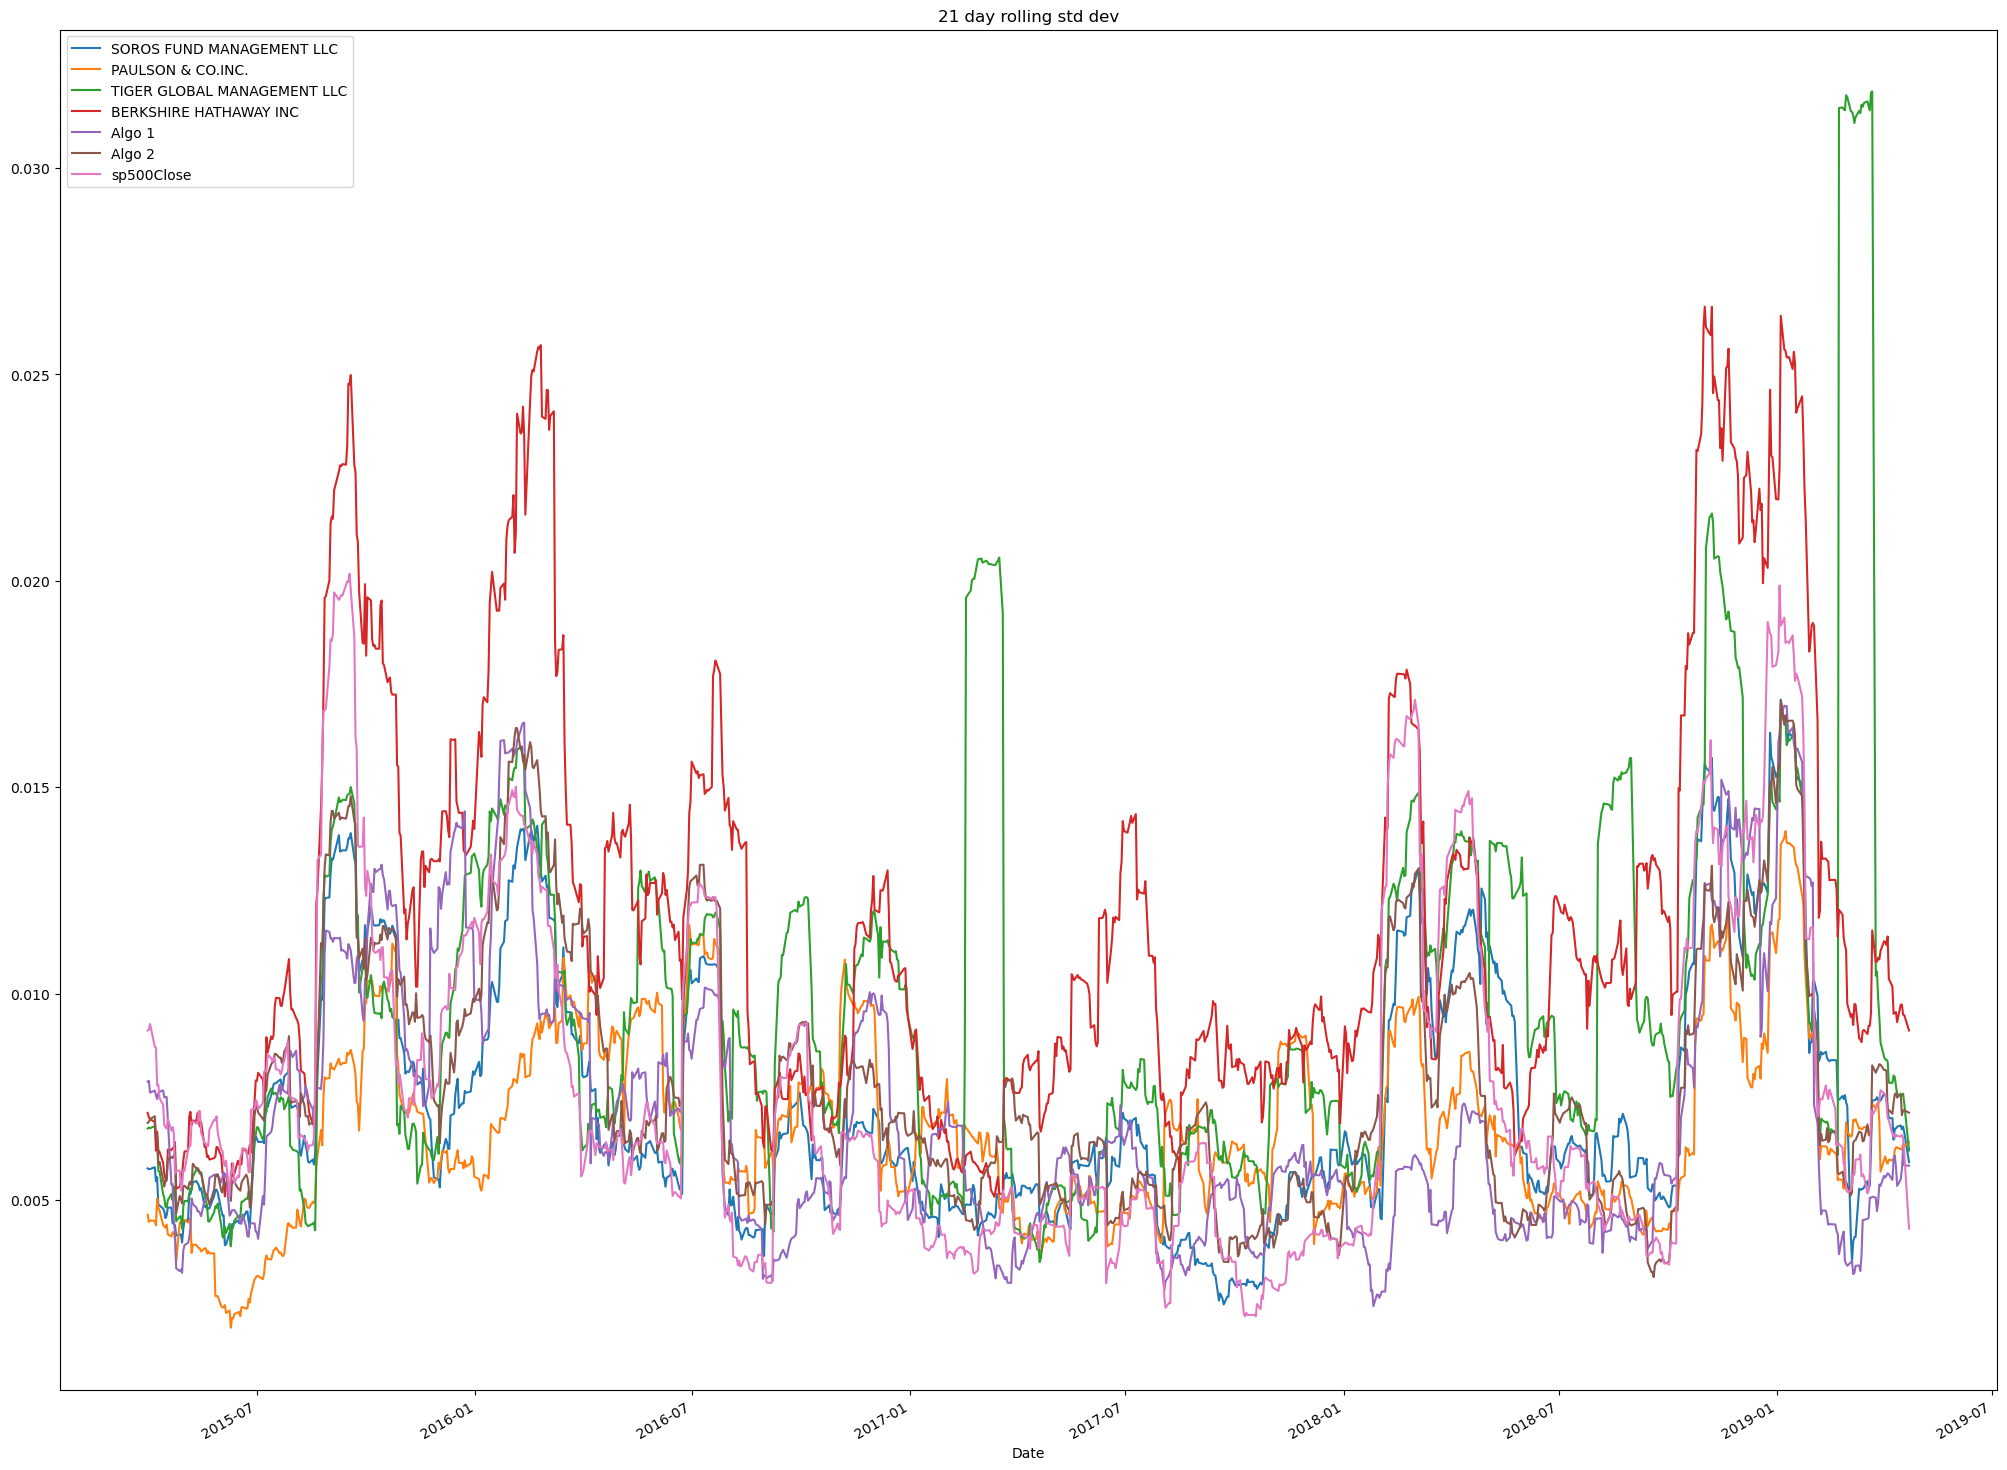

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_whale_df.rolling(window=21).std().plot(title="21 day rolling std dev", figsize=(25, 20))

### Calculate and plot the correlation

In [32]:
# Calculate the correlation
#Use corr() function to find the correlation among the columns in the Dataframe using the ‘Pearson’ method. 

combined_whale_df_correlation = combined_whale_df.corr()
# Display de correlation matrix
combined_whale_df_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30 day covariance of Algo 1 vs sp 500'}, xlabel='Date'>

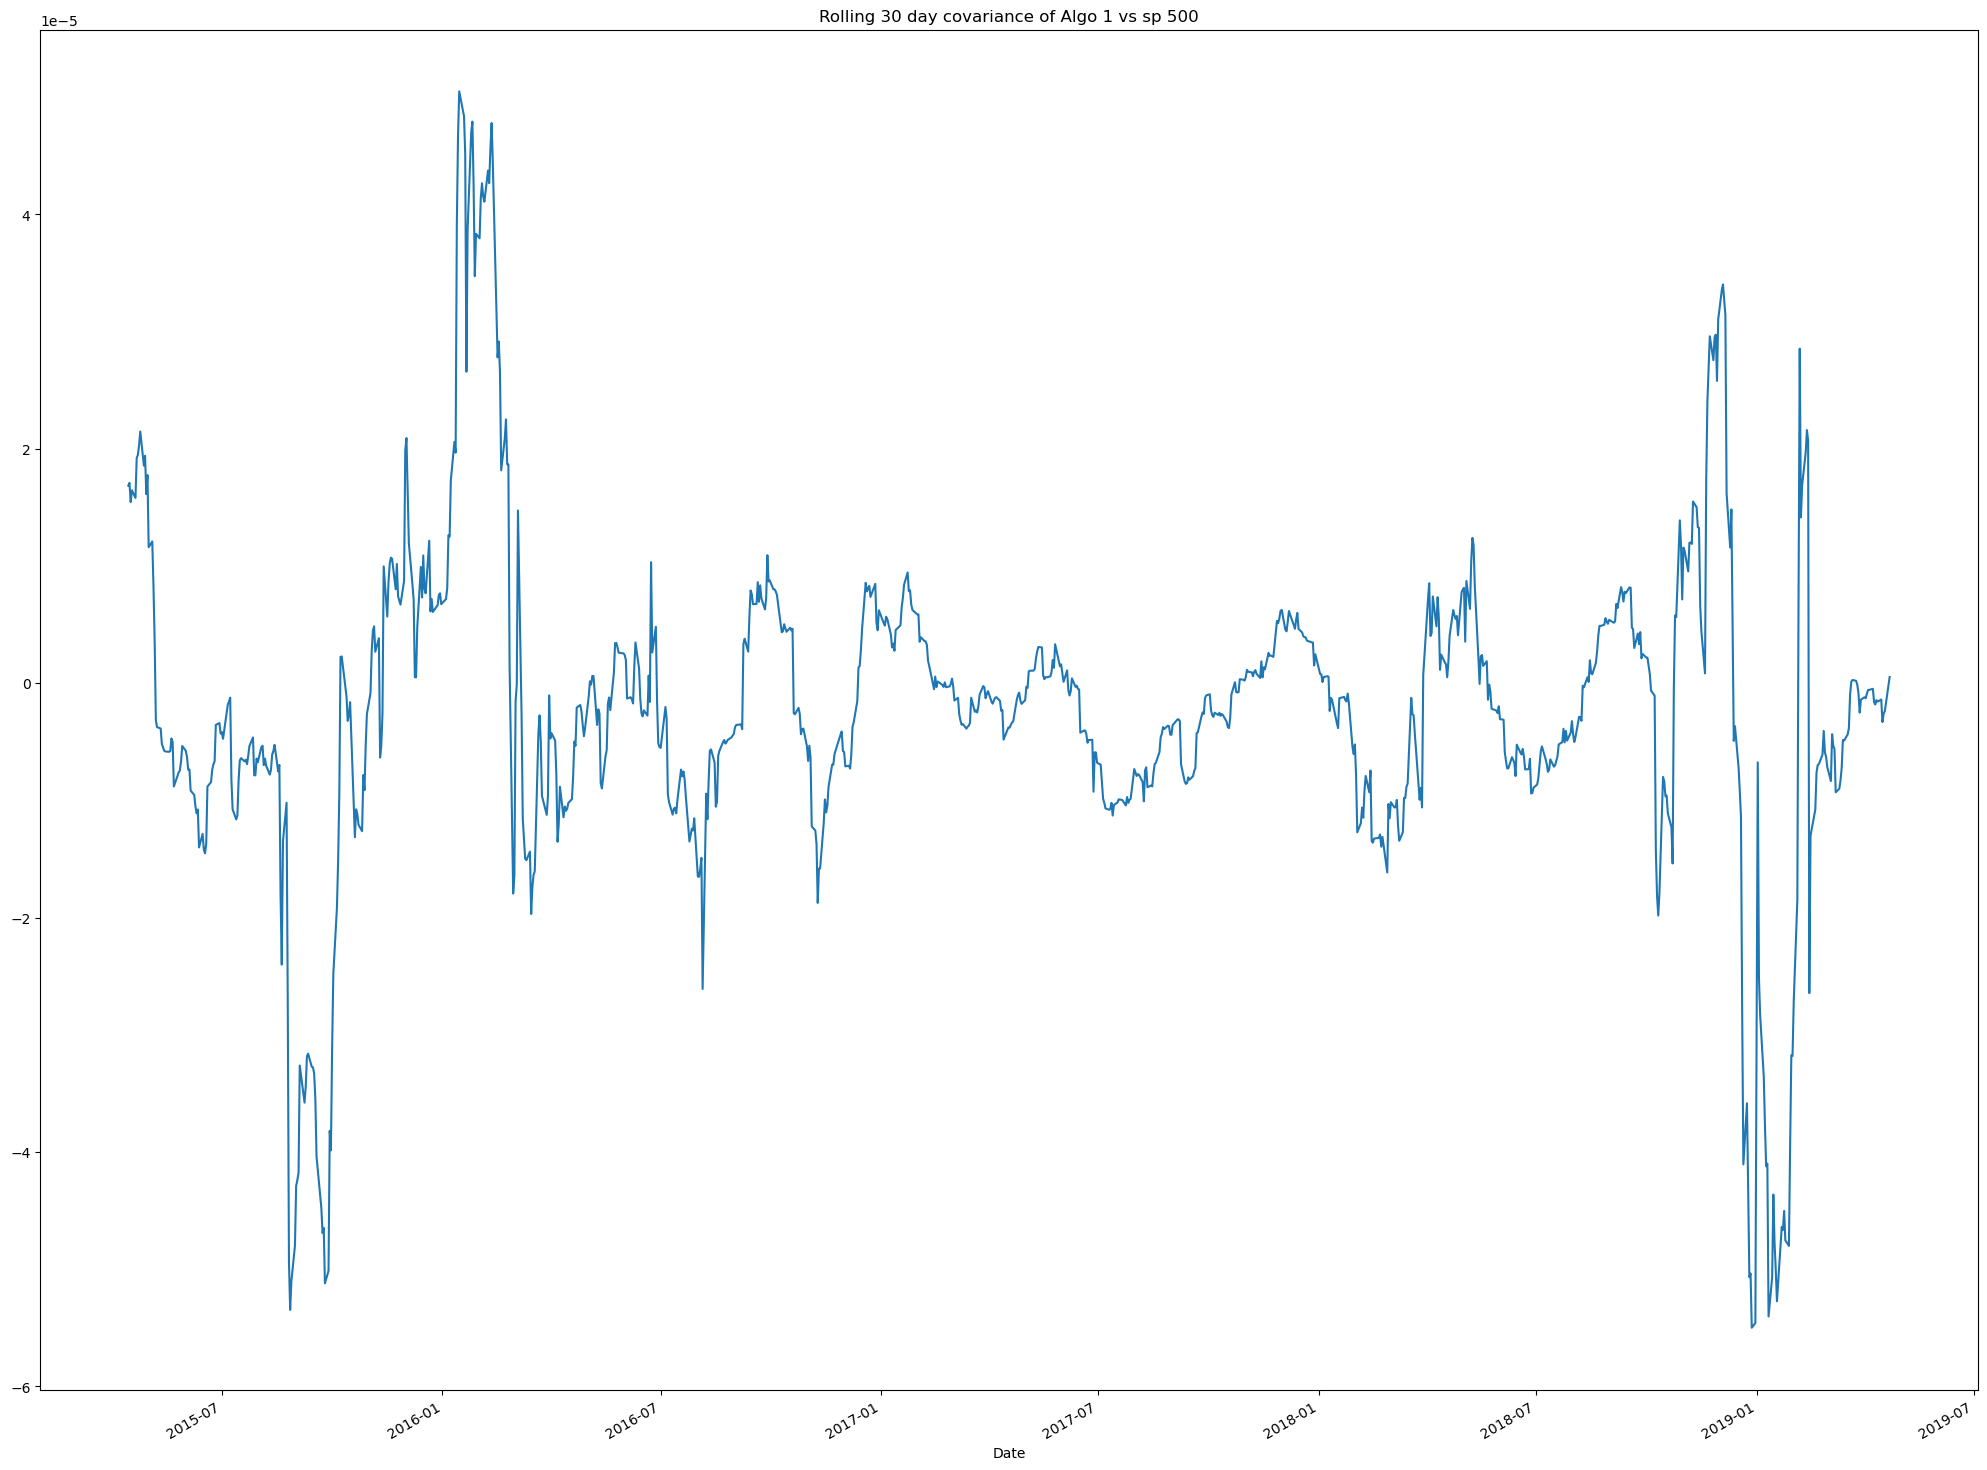

In [33]:
# Calculate covariance of a single portfolio
# Since the activity is to determine if algo 1 or algo 2 are performing better, I will pick algo 1 to check if its doing 
# better than sp500
algo_1_covariance = combined_whale_df['Algo 1'].rolling(window=30).cov(combined_whale_df['sp500Close'])
algo_1_covariance.plot(title='Rolling 30 day covariance of Algo 1 vs sp 500', figsize=(25,20))



<AxesSubplot:title={'center':'Rolling 30 day covariance of sp 500'}, xlabel='Date'>

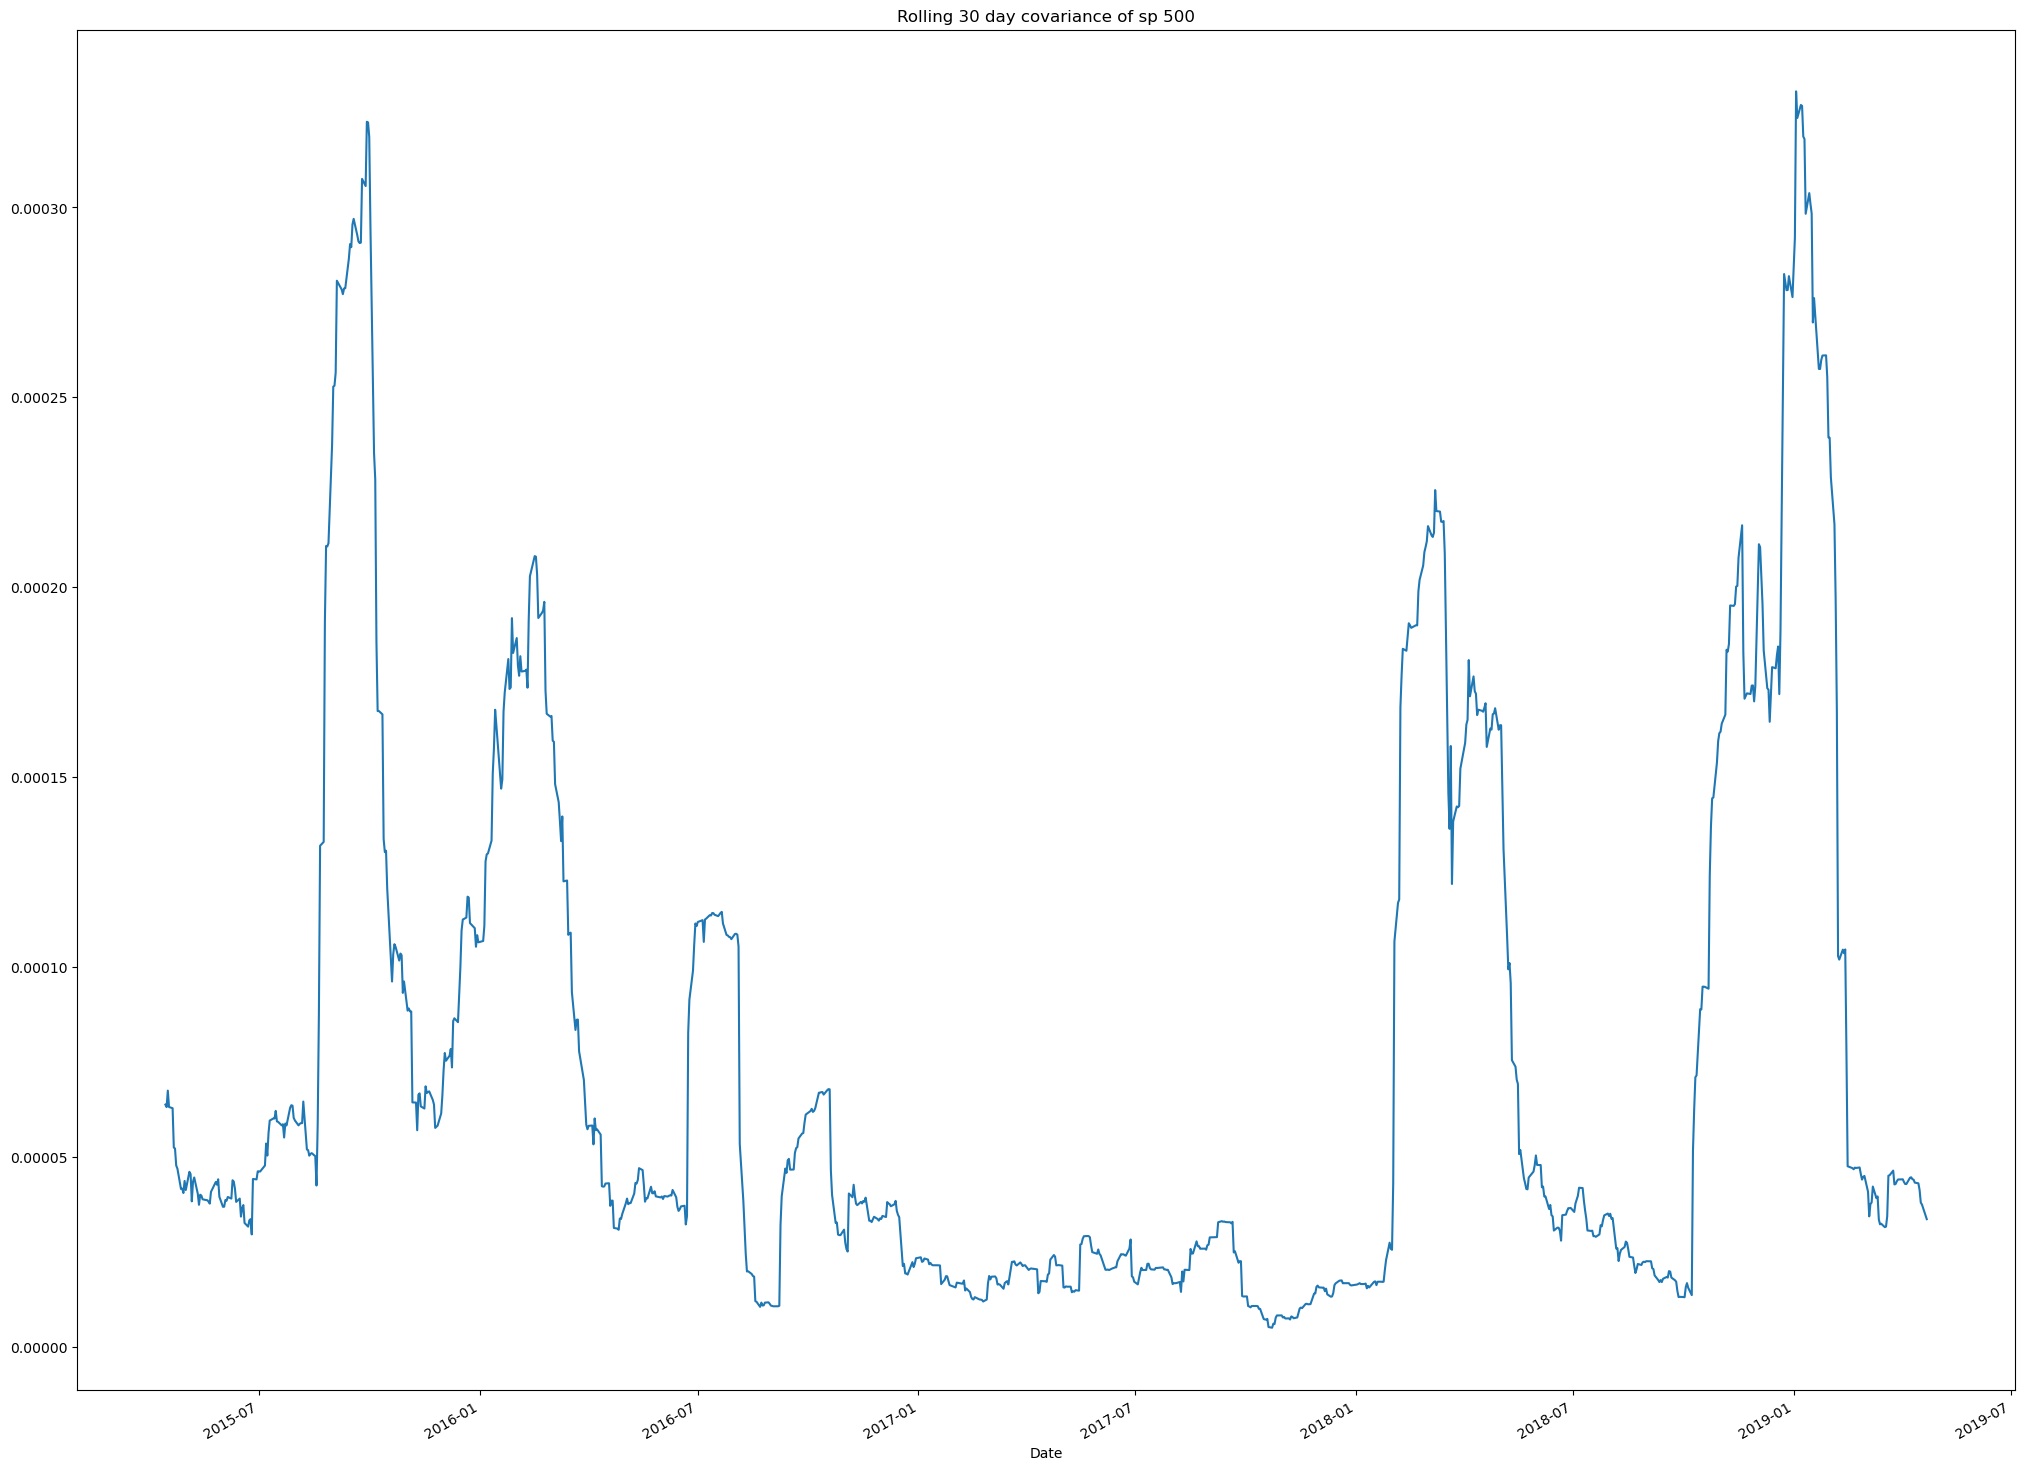

In [34]:
# Calculate variance of S&P 500
sp500_variance = combined_whale_df['sp500Close'].rolling(window=30).var()
sp500_variance.plot(title='Rolling 30 day covariance of sp 500', figsize=(25,20))




<AxesSubplot:title={'center':'Rolling 30 day Beta of Algo 1'}, xlabel='Date'>

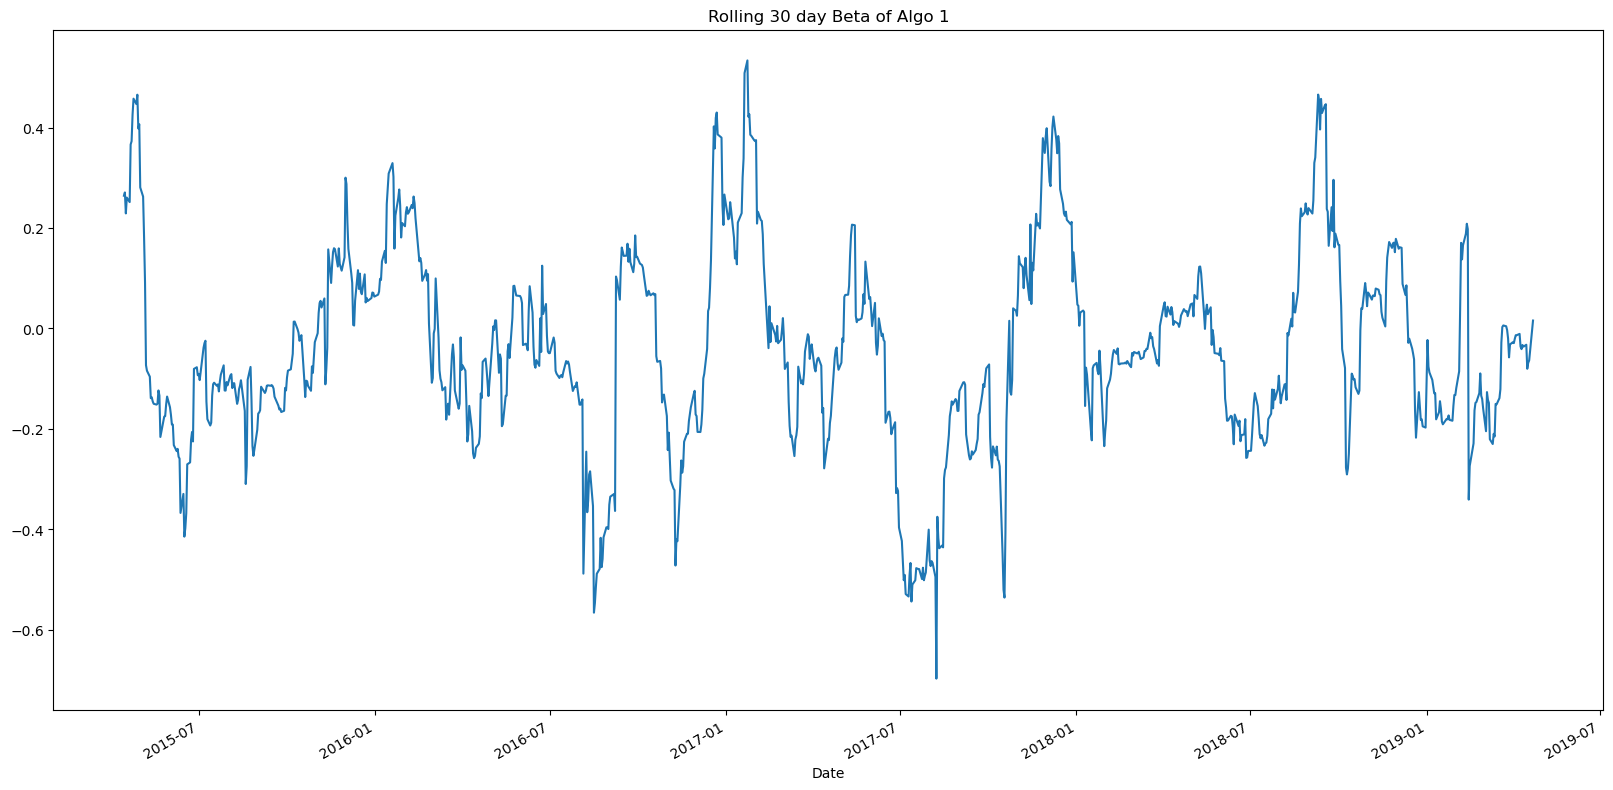

In [35]:
# Computing beta
beta_algo_1 = algo_1_covariance/sp500_variance

# Plot beta trend
beta_algo_1.plot(title='Rolling 30 day Beta of Algo 1', figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM calculation'}, xlabel='Date'>

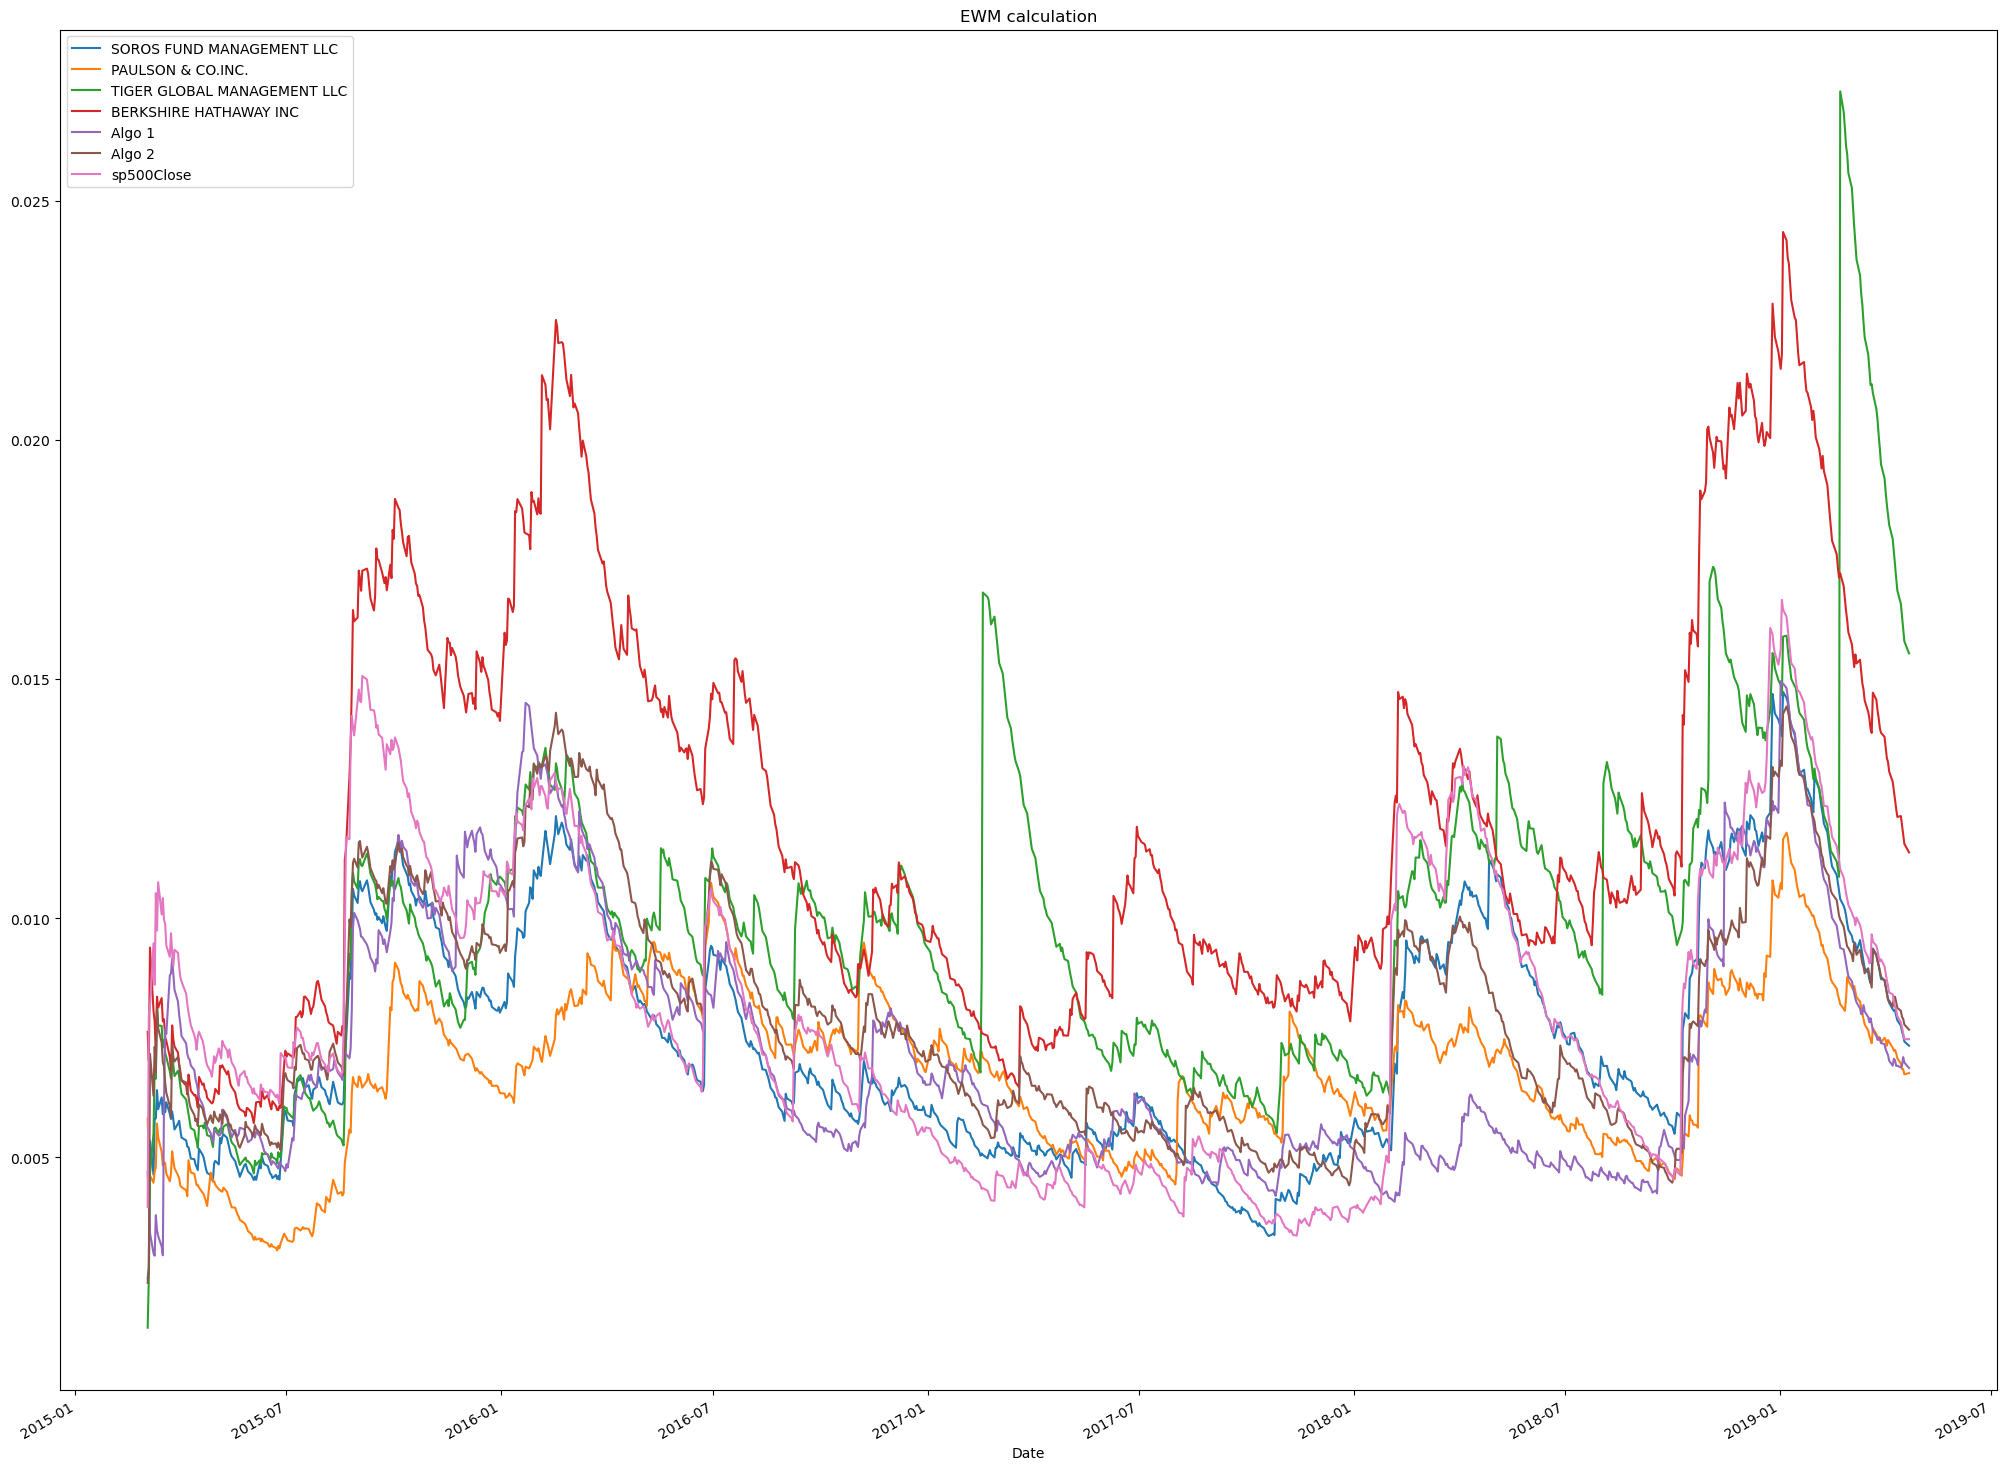

In [36]:
# Use `ewm` to calculate the rolling window
# LearnThroError - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
# rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))

rolling_statistics_ewm = combined_whale_df.ewm(adjust=True, halflife=21).std().plot(title = "EWM calculation", figsize=(25,20))
rolling_statistics_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
combined_whale_df_sharpe_ratios = (combined_whale_df.mean() * 252)/(combined_whale_df.std() * np.sqrt(252))
combined_whale_df_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500Close                    -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

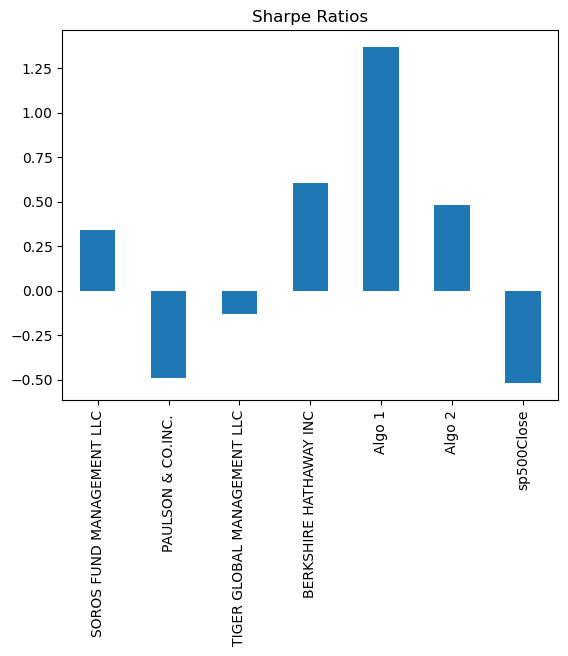

In [40]:
# Visualize the sharpe ratios as a bar plot
combined_whale_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 performed better than even SP500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!